# Code for MLDM LSA - Dataset 2(Pima Indians Diabetes Dataset)

## 1. Data Preparation, Pre-processing, Integration and Exploration

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

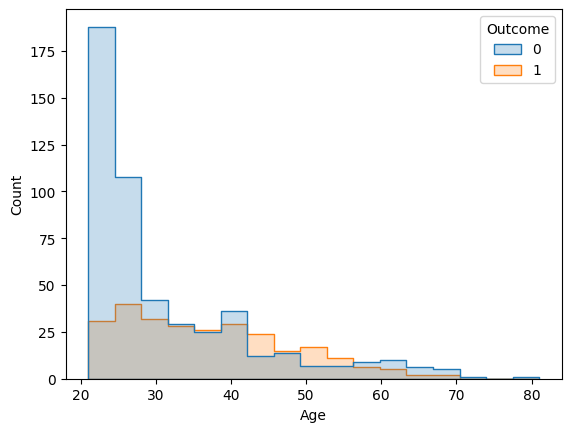

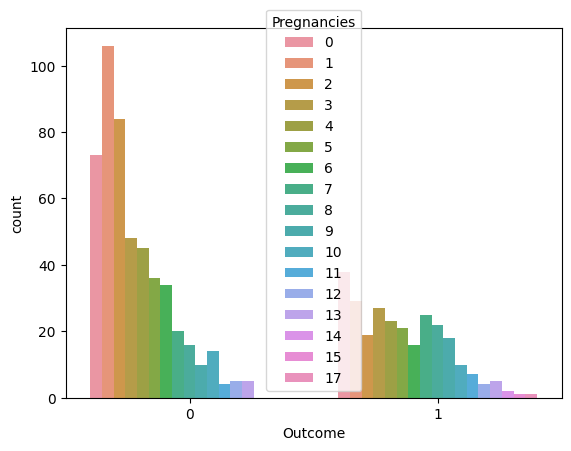

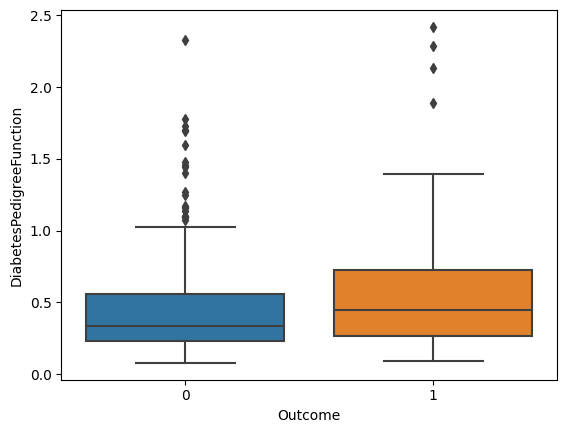

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
# Load data
df = pd.read_csv('diabetes.csv')

In [ ]:
# Explore data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Check for data imbalance
print(df['Outcome'].value_counts())

In [ ]:
# Visualize data
sns.histplot(df, x='Age', hue='Outcome', element='step')
plt.show()

sns.countplot(data=df, x='Outcome', hue='Pregnancies')
plt.show()

sns.boxplot(data=df, x='Outcome', y='DiabetesPedigreeFunction')
plt.show()

In [ ]:
# Preprocess data
# Replace zeros with NaNs for relevant columns
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

# Impute missing values using median imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[cols] = imputer.fit_transform(df[cols])

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
#Features for plotting corelation matrix
num_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Outcome']
correlation_df=df[num_cols]

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'Outcome'],
      dtype='object')


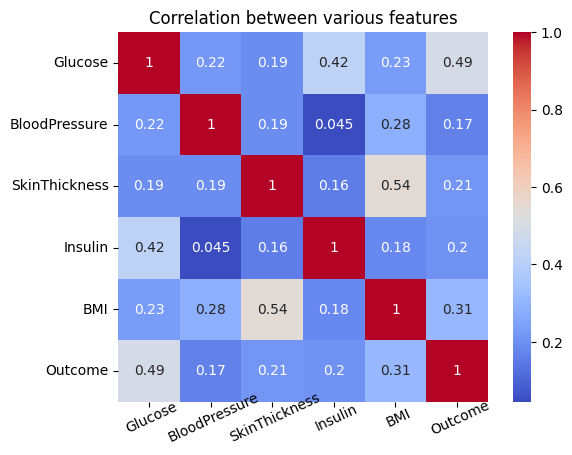

In [29]:
#Import the necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Arrange the data as a dataframe


# Plotting only 10 features
NUM_POINTS = 6
features_mean= list(correlation_df.columns[0:NUM_POINTS])
feature_names = correlation_df.columns[0:NUM_POINTS]
print(feature_names)
f,ax = plt.subplots(1,1) #plt.figure(figsize=(10,10))
sns.heatmap(correlation_df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
# Set number of ticks for x-axis
ax.set_xticks([float(n)+0.5 for n in range(NUM_POINTS)])
# Set ticks labels for x-axis
ax.set_xticklabels(feature_names, rotation=25, rotation_mode="anchor",fontsize=10)
# Set number of ticks for y-axis
ax.set_yticks([float(n)+0.5 for n in range(NUM_POINTS)])
# Set ticks labels for y-axis
ax.set_yticklabels(feature_names, rotation='horizontal', fontsize=10)
plt.title("Correlation between various features")
plt.show()
plt.close()

## 2. Model Development and Evaluation

Naive Bayes: 0.750594 (0.046335)
Accuracy for Validation set Naive Bayes: 0.731703
Decision Tree: 0.737107 (0.061204)
Accuracy for Validation set Decision Tree: 0.684239
MLP: 0.649930 (0.005581)
Accuracy for Validation set MLP: 0.653623
SVM: 0.754333 (0.069367)
Accuracy for Validation set SVM: 0.709420


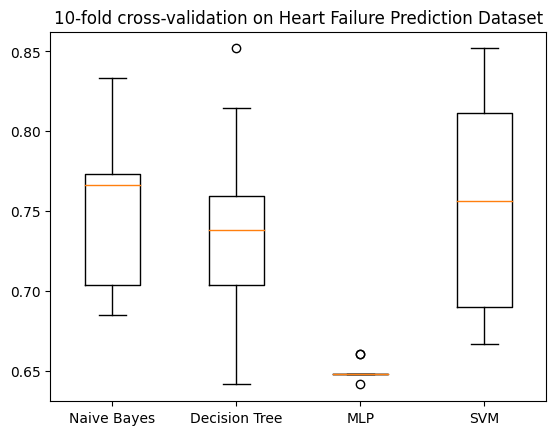

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import  svm
# Spot Check Algorithms
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))
models.append(('SVM',svm.SVC(gamma=0.001)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        cv_results_validation = cross_val_score(model, X_test, y_test, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
        print("Accuracy for Validation set",'%s: %f' % (name, cv_results_validation.mean()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('10-fold cross-validation on Pima Indians Diabetes Dataset')
plt.show()

## 3. Exploring Hyper-parameters for each model

In [19]:
from sklearn.model_selection import GridSearchCV
nb = GaussianNB()
#Naive Bayes params
nb_params = {
'var_smoothing':[1e-5, 1e-2, 0.1]
}

#Decision Tree params
dt_params = {
'max_depth':[3,5,8,10],
'min_samples_leaf':[1,2,4],
'criterion' :['gini', 'entropy'],
'max_features': [2,4,6]
}

#MLP params
mlp_params = {
'hidden_layer_sizes':[(50,), (100,50), (100,)],
'learning_rate': ['constant','adaptive'],
'momentum': [0.8,0.9, 0.99],
'solver': ['lbfgs', 'adam'],
'activation': ['tanh', 'relu'],
'early_stopping': [True, False]
}
svm_param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear','rbf'],
    'gamma': ['scale',0.001],
    'coef0': [-1, 0, 1]
}

nb_tuned = GridSearchCV(nb, nb_params, cv=5)
nb_tuned.fit(X_train, y_train)

dt_tuned = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_tuned.fit(X_train, y_train)

mlp_tuned = GridSearchCV(MLPClassifier(), mlp_params, cv=5)
mlp_tuned.fit(X_train, y_train)

svm_tuned = GridSearchCV(svm.SVC(), svm_param_grid, cv=5)
svm_tuned.fit(X_train, y_train)
#Best parameters
print(nb_tuned.best_params_)
print(dt_tuned.best_params_)
print(mlp_tuned.best_params_)
print(svm_tuned.best_params_)
#Best scores
print(nb_tuned.best_score_)
print(dt_tuned.best_score_)
print(mlp_tuned.best_score_)
print(svm_tuned.best_score_)

{'C': 10}
0.7634994807892003


## 4.Tuning Models with Parameters and Exploring results

In [31]:
models = []
models.append(('Naive Bayes', GaussianNB(var_smoothing=1e-05)))
models.append(('Decision Tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=4, min_samples_leaf=4)))  
models.append(('MLP', MLPClassifier(random_state=0, activation='relu',early_stopping=False, hidden_layer_sizes=(50,), max_iter=100,learning_rate='constant', momentum= 0.8, solver='lbfgs')))
models.append(('SVM',svm.SVC(gamma='scale',coef0=-1,C=100,kernel='linear',probability=True)))
# evaluate each model in turn
results = {'accuracy':[], 'precision':[], 'roc_auc':[]}
names = []

for name, model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
        
        # Accuracy
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results['accuracy'].append(cv_results)      
        
        # Precision    
        cv_precision = cross_val_score(model, X_train, y_train, cv=kfold, 
                             scoring='precision')           
        results['precision'].append(cv_precision)
        
        # ROC AUC   
        cv_roc_auc = cross_val_score(model, X_train, y_train, cv=kfold, 
                           scoring='roc_auc')            
        results['roc_auc'].append(cv_roc_auc)
        
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Naive Bayes: 0.761665 (0.014662)
Decision Tree: 0.746746 (0.021451)
MLP: 0.677968 (0.041750)
SVM: 0.765421 (0.023244)


## 5. Comparing models based on Accuracy, Precision and ROC AUC (performance metricies)

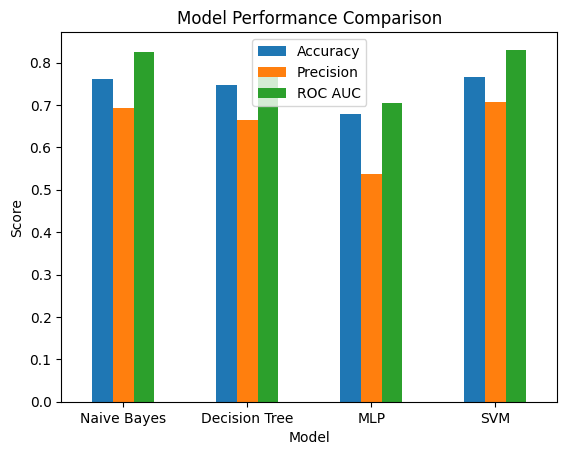

<Figure size 1200x600 with 0 Axes>

In [32]:
# Combine results into a DataFrame
metric_df = pd.DataFrame({
    'Accuracy': [x.mean() for x in results['accuracy']],  
    'Precision': [x.mean() for x in results['precision']],
    'ROC AUC': [x.mean() for x in results['roc_auc']]
})

metric_df['Model'] = names

ax = metric_df.plot.bar(x='Model', rot=0)  
# Rest of plot code...

# Plot grouped bar plot
plt.figure(figsize=(12,6))


# Add metric labels to the legend
ax.legend(['Accuracy','Precision','ROC AUC'])   

# Add title and axis labels
ax.set_title('Model Performance Comparison')  
ax.set_xlabel('Model')
ax.set_ylabel('Score')

plt.show()

### ROC AUC Curve

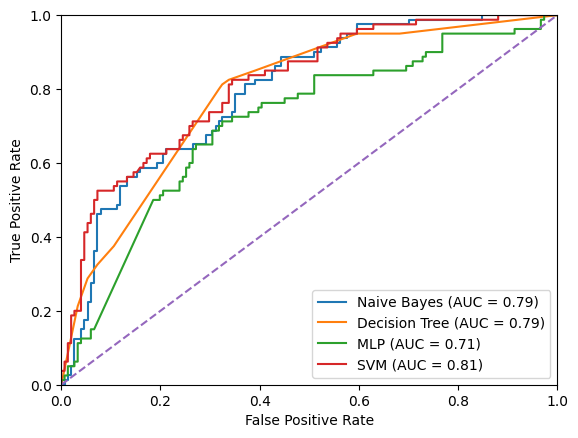

In [33]:
from sklearn.metrics import roc_curve, auc
# Create subplot
fig, ax = plt.subplots()

# Plot each ROC curve
for name, model in models:
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    probs = model.predict_proba(X_test)[:,1] 
    
    # Calculate ROC curve and area under curve (AUC) score
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Decorations
ax.plot([0, 1], [0, 1], linestyle='--')        
ax.set(xlim=[0, 1], ylim=[0, 1], 
        xlabel='False Positive Rate',
        ylabel='True Positive Rate')
ax.legend(loc="lower right")

### Comparing performances of developed models

In [34]:
metric_df

,Accuracy,Precision,ROC AUC,Model
0,0.761665,0.691582,0.823865,Naive Bayes
1,0.746746,0.665539,0.787475,Decision Tree
2,0.677968,0.535925,0.703544,MLP
3,0.765421,0.706542,0.830135,SVM


In [35]:
metric_df = metric_df[['Model', 'Accuracy', 'Precision', 'ROC AUC']]

In [36]:
metric_df=metric_df.set_index('Model')

In [37]:
metric_df

,Accuracy,Precision,ROC AUC
Model,,,
Naive Bayes,0.761665,0.691582,0.823865
Decision Tree,0.746746,0.665539,0.787475
MLP,0.677968,0.535925,0.703544
SVM,0.765421,0.706542,0.830135
